## Libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas_profiling import ProfileReport

## EDA

In [43]:
df_telco_clean = pd.read_csv('df_telco_clean.csv')

In [44]:
report_telco = ProfileReport(df_telco_clean)

In [45]:
report_telco.to_file(output_file='report_telco.html')
# see the file report_telco.html on repository

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Report conclusions
- The target (Churn) is unbalanced, the churn rate is 26.6%
- The gender is almost 50% for male and female
- There are more customers :
    - under 65 years old
    - with phone service
    - without dependents
    - with montly contract
- Customer tenure is highly correlated with Account charges total

### Churn 0

In [46]:
df_telco_churn_0 = df_telco_clean[df_telco_clean['Churn'] == 0]

## EDA

In [47]:
df_telco_churn_0.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,account_Charges_Daily
0,0002-ORFBO,0,Female,< 65 years,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,< 65 years,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
5,0013-MHZWF,0,Female,< 65 years,No,Yes,9,Yes,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,2.31
6,0013-SMEOE,0,Female,>= 65 years,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,3.66
7,0014-BMAQU,0,Male,< 65 years,Yes,No,63,Yes,Yes,Fiber optic,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80,2.82


In [48]:
# Categorical features
list_cat = ['customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod']

In [49]:
#analysing categorical features
for column in list_cat:
  print(column)
  print()
  print(df_telco_churn_0[column].value_counts(normalize = True))

customer_gender

Male      0.507263
Female    0.492737
Name: customer_gender, dtype: float64
customer_SeniorCitizen

< 65 years     0.871005
>= 65 years    0.128995
Name: customer_SeniorCitizen, dtype: float64
customer_Partner

Yes    0.5276
No     0.4724
Name: customer_Partner, dtype: float64
customer_Dependents

No     0.656595
Yes    0.343405
Name: customer_Dependents, dtype: float64
phone_PhoneService

Yes    0.90122
No     0.09878
Name: phone_PhoneService, dtype: float64
phone_MultipleLines

No                  0.491187
Yes                 0.410033
No phone service    0.098780
Name: phone_MultipleLines, dtype: float64
internet_InternetService

DSL            0.379043
Fiber optic    0.348441
No             0.272516
Name: internet_InternetService, dtype: float64
internet_OnlineSecurity

No                     0.394344
Yes                    0.333140
No internet service    0.272516
Name: internet_OnlineSecurity, dtype: float64
internet_OnlineBackup

Yes                    0.368390
No

customer_gender


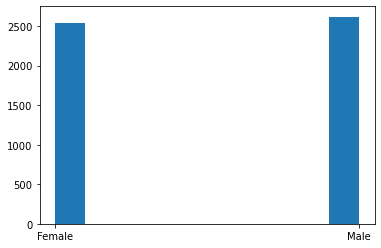

customer_SeniorCitizen


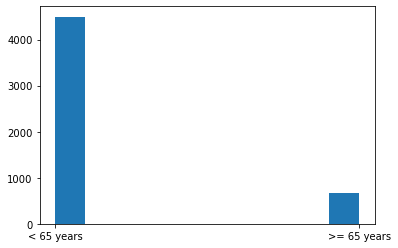

customer_Partner


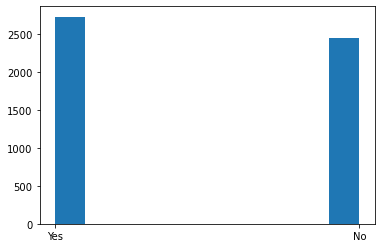

customer_Dependents


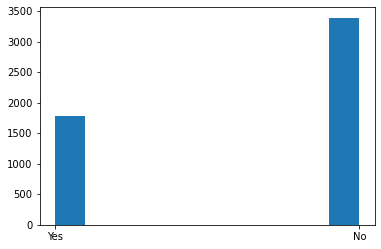

phone_PhoneService


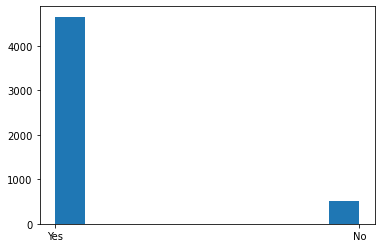

phone_MultipleLines


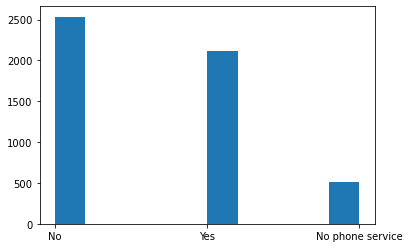

internet_InternetService


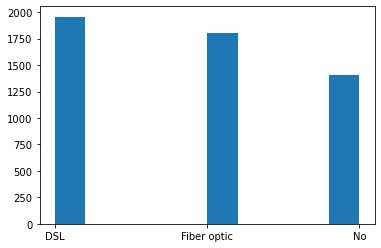

internet_OnlineSecurity


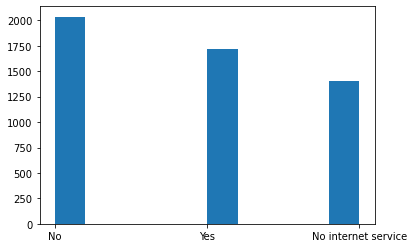

internet_OnlineBackup


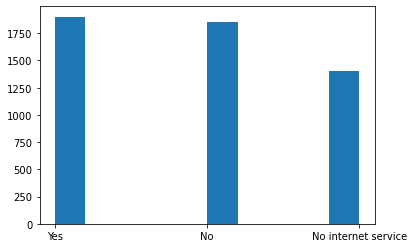

internet_DeviceProtection


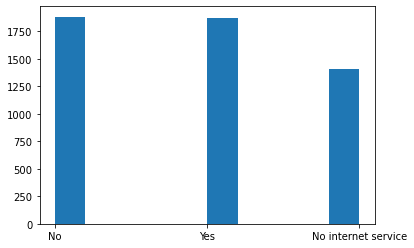

internet_TechSupport


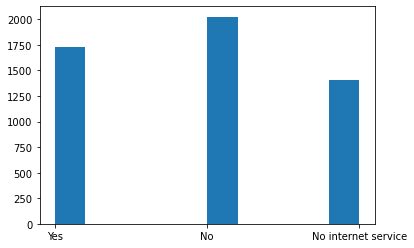

internet_StreamingTV


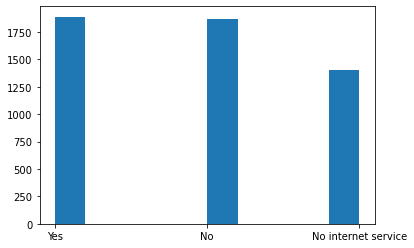

internet_StreamingMovies


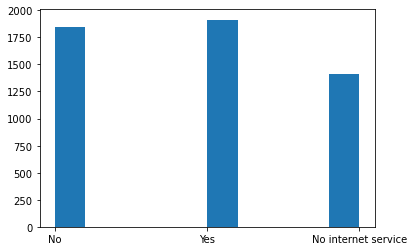

account_Contract


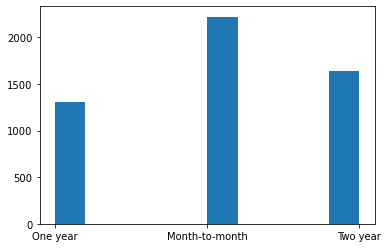

account_PaperlessBilling


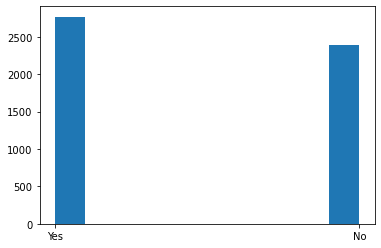

account_PaymentMethod


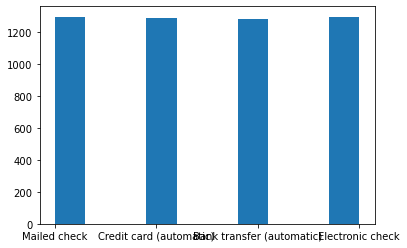

In [50]:
%matplotlib inline 
# Histogram for categorical features
for item in list_cat:
  print(item)
  plt.hist(df_telco_churn_0[item])
  plt.show()

In [51]:
df_telco_churn_0.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5163.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
customer_tenure,5163.0,37.650010,24.076940,1.00,15.000,38.00,61.000,72.00
account_Charges_Monthly,5163.0,61.307408,31.094557,18.25,25.100,64.45,88.475,118.75
account_Charges_Total,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
account_Charges_Daily,5163.0,2.043486,1.036560,0.61,0.840,2.15,2.950,3.96


In [52]:
report_telco_churn_0 = ProfileReport(df_telco_churn_0)

In [53]:
report_telco_churn_0.to_file(output_file='report_telco_churn_0.html')
# see the file report_telco_churn_0.html on repository

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Conclusions Churn = 0
- Mostly :
    - are under 65 years old
    - don't have dependents
    - have phone service
- Top 1 contract is month-to-month
- Customer tenure (average) : 37 months
- Account charges monthly (average): 61.30 US$
- Customer tenure is highly correlated with Account charges total

### Churn = 1

In [54]:
df_telco_churn_1 = df_telco_clean[df_telco_clean['Churn'] == 1]

In [55]:
df_telco_churn_1.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,account_Charges_Daily
2,0004-TLHLJ,1,Male,< 65 years,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,>= 65 years,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,>= 65 years,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80
18,0022-TCJCI,1,Male,>= 65 years,No,No,45,Yes,No,DSL,...,Yes,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.50,2.09
19,0023-HGHWL,1,Male,>= 65 years,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.10,0.84


In [56]:
#analysing categorical features
for column in list_cat:
  print(column)
  print(df_telco_churn_1[column].value_counts(normalize = True))
  print()

customer_gender
Female    0.502408
Male      0.497592
Name: customer_gender, dtype: float64

customer_SeniorCitizen
< 65 years     0.745318
>= 65 years    0.254682
Name: customer_SeniorCitizen, dtype: float64

customer_Partner
No     0.642055
Yes    0.357945
Name: customer_Partner, dtype: float64

customer_Dependents
No     0.825575
Yes    0.174425
Name: customer_Dependents, dtype: float64

phone_PhoneService
Yes    0.909042
No     0.090958
Name: phone_PhoneService, dtype: float64

phone_MultipleLines
Yes                 0.454789
No                  0.454254
No phone service    0.090958
Name: phone_MultipleLines, dtype: float64

internet_InternetService
Fiber optic    0.693954
DSL            0.245586
No             0.060460
Name: internet_InternetService, dtype: float64

internet_OnlineSecurity
No                     0.781701
Yes                    0.157838
No internet service    0.060460
Name: internet_OnlineSecurity, dtype: float64

internet_OnlineBackup
No                     0.6597

customer_gender


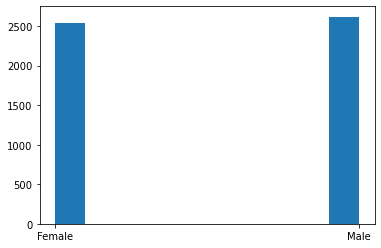

customer_SeniorCitizen


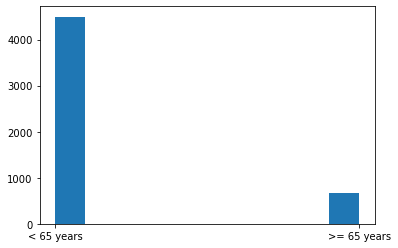

customer_Partner


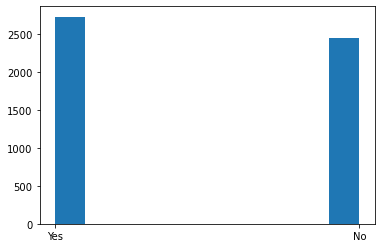

customer_Dependents


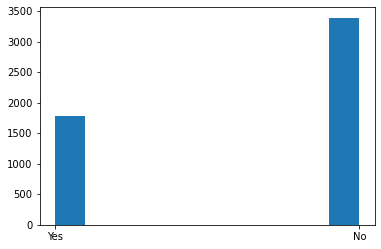

phone_PhoneService


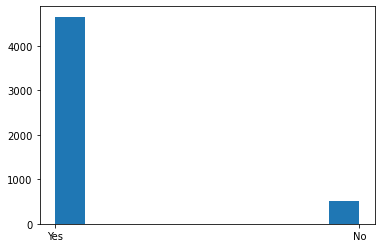

phone_MultipleLines


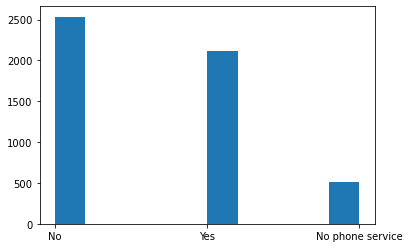

internet_InternetService


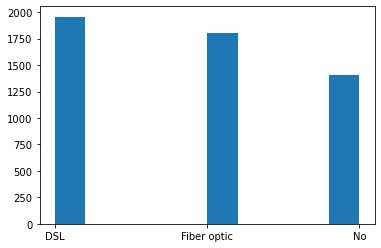

internet_OnlineSecurity


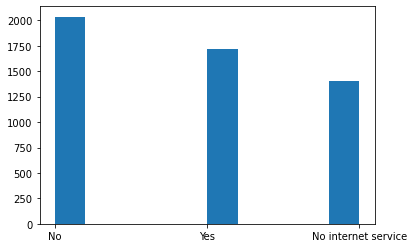

internet_OnlineBackup


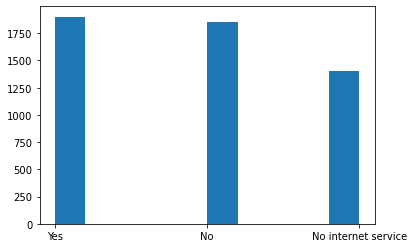

internet_DeviceProtection


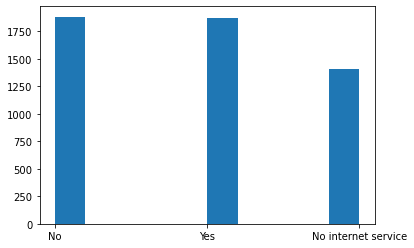

internet_TechSupport


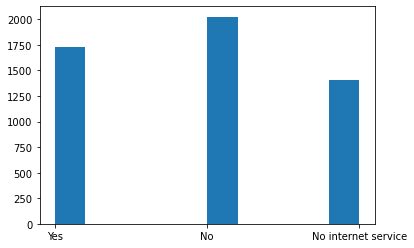

internet_StreamingTV


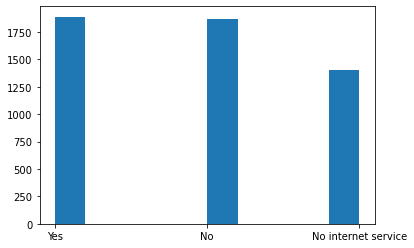

internet_StreamingMovies


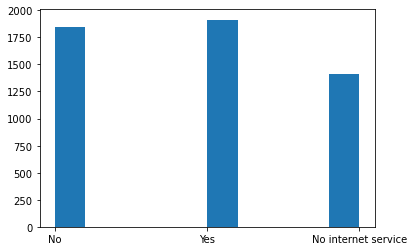

account_Contract


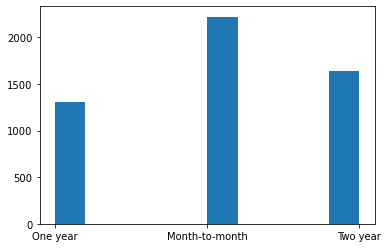

account_PaperlessBilling


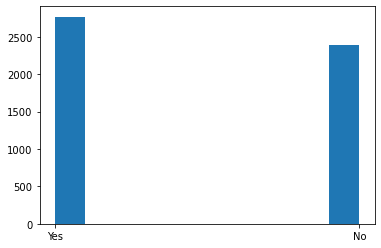

account_PaymentMethod


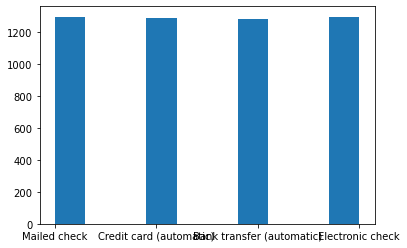

In [57]:
%matplotlib inline 
# Histogram for categorical features
for item in list_cat:
  print(item)
  plt.hist(df_telco_churn_0[item])
  plt.show()

In [58]:
df_telco_churn_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,1869.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
customer_tenure,1869.0,17.979133,19.531123,1.00,2.00,10.00,29.00,72.00
account_Charges_Monthly,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.20,118.35
account_Charges_Total,1869.0,1531.796094,1890.822994,18.85,134.50,703.55,2331.30,8684.80
account_Charges_Daily,1869.0,2.481450,0.822287,0.63,1.87,2.66,3.14,3.94


In [59]:
report_telco_churn_1 = ProfileReport(df_telco_churn_1)

In [60]:
report_telco_churn_1.to_file(output_file='report_telco_churn_1.html')
# see the file report_telco_churn_1.html on repository

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Conclusions Churn = 1
- Mostly :
    - are under 65 years old
    - don´t have customer partner
    - don't have dependents
    - have phone service
    - have fiber optic internet
    - have internet Online Security
    - have internet OnlineBackup
    - have internet Device Protection
    - have internet TechSupport
    - have monthly contract
    - have Paperless Billing   
- Customer tenure (average) : 17 months
- Account charges monthly (average): 74.44 US$
- Customer tenure is highly correlated with Account charges total